# 01. Working with time-series data

In [3]:
import pandas as pd
pd.to_datetime('13th of February, 2009')
#Timestamp('2009-02-13 00:00:00')
pd.to_datetime('02-13-2009')
#Timestamp('2009-02-13 00:00:00')
pd.to_datetime('Feb 13, 2009')
#Timestamp('2009-02-13 00:00:00'

Timestamp('2009-02-13 00:00:00')

In [4]:
pd.to_datetime('Feb 13, 2009 14:20:00')
#Timestamp('2009-02-13 14:20:00')

Timestamp('2009-02-13 14:20:00')

In [5]:
pd.to_datetime('now')

Timestamp('2021-05-28 11:22:12.797046')

In [6]:
pd.to_datetime('Feb 13, 2009 14:20:00').day_name()

'Friday'

In [7]:
date1 = pd.Timestamp('2018-03-03')
date2 = pd.Timestamp('1984-03-03')
date1-date2
#Timedelta('12418 days 00:00:00')

Timedelta('12418 days 00:00:00')

In [8]:
 pd.Timedelta(days=54, hours=3)
#Timedelta('54 days 03:00:00')

Timedelta('54 days 03:00:00')

In [9]:
date1 + pd.Timedelta(days=54, hours=3)
#Timestamp('2018-04-26 03:00:00')

Timestamp('2018-04-26 03:00:00')

In [10]:
jan2015 = pd.Period('2015-01')

## 02. The Timestamp, Timedelta, and Period objects

## 05. Frequencies and offsets
H Hour
D Day
W Week
M Month
Q Quarter
A Year


BDay Business day
Week One week, optionally anchored on a day of the week
MonthEnd
YearEnd

In [11]:
pd.DateOffset(days=1)

<DateOffset: days=1>

In [12]:
pd.Timestamp('2010.01.01') + pd.DateOffset(days=1)
#Timestamp('2010-01-02 00:00:00')

Timestamp('2010-01-02 00:00:00')

In [13]:
from pandas.tseries.offsets import *

In [14]:
pd.date_range('2010-07-07', periods=5, freq=BDay())

DatetimeIndex(['2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13'],
              dtype='datetime64[ns]', freq='B')

In [15]:
pd.date_range('2010-07-07', periods=10, freq=BDay())

DatetimeIndex(['2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13', '2010-07-14', '2010-07-15', '2010-07-16',
               '2010-07-19', '2010-07-20'],
              dtype='datetime64[ns]', freq='B')

## 06. Example: financial data


In [17]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data = pd.read_csv('data/financial_data.csv', index_col='Date')
data.index = pd.to_datetime(data.index, format='%d.%m.%y') # Convert the index

In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-06-01,8.04,8.13,7.83,8.00,1.84,741000.0
1984-06-04,8.33,8.67,8.17,8.46,1.95,584700.0
1984-06-05,8.46,8.54,8.25,8.38,1.93,5370300.0
1984-06-06,8.38,8.54,8.38,8.54,1.97,365700.0
1984-06-07,8.54,8.58,8.46,8.54,1.97,904800.0


In [20]:
 prices = data['Close']
 prices.index

DatetimeIndex(['1984-06-01', '1984-06-04', '1984-06-05', '1984-06-06',
               '1984-06-07', '1984-06-08', '1984-06-11', '1984-06-12',
               '1984-06-13', '1984-06-14',
               ...
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
               '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', name='Date', length=9137, freq=None)

In [22]:
prices['2012-01-01':'2012-04-01'].head()

Date
2012-01-03    34.98
2012-01-04    34.95
2012-01-05    35.68
2012-01-06    35.36
2012-01-09    35.30
Name: Close, dtype: float64

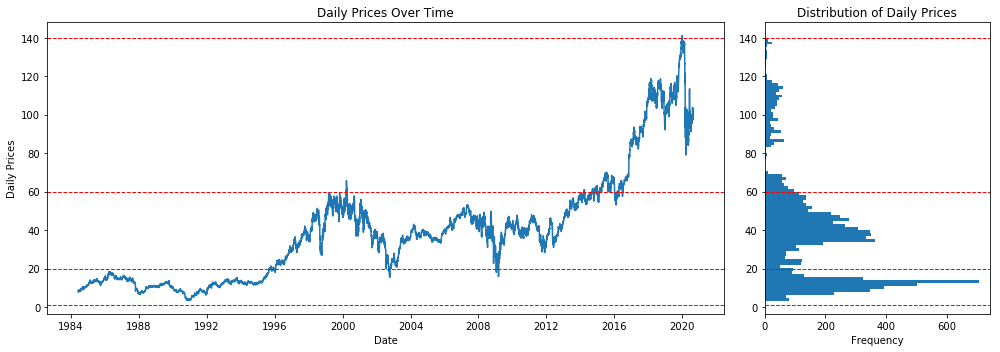

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the trend and histogram of prices together
# initialize two subplots in 1 row and two columns. Also specify the width of each plot
fig, ax = plt.subplots(1,2,figsize=(14, 5),gridspec_kw={'width_ratios': [3, 1]})

# create the first plot for the prices over time
ax[0].set_title('Daily Prices Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Daily Prices')
ax[0].plot(prices)
for i in [1,20,60,140]:
    ax[0].axhline(i,color='r', linewidth=1, linestyle='--')

# create the histogram of prices in the second plot
ax[1].set_title('Distribution of Daily Prices')
ax[1].set_xlabel('Frequency')
ax[1].hist(prices,bins=90,orientation='horizontal')
for i in [1,20,60,140]:
    ax[1].axhline(i,color='r', linewidth=1, linestyle='--')

fig.tight_layout()
plt.show()

## 07. Shifting and computing first differences

In [25]:
Pt=prices['2019-12-15':'2019-12-30']
Pt

Date
2019-12-16    137.34
2019-12-17    138.18
2019-12-18    138.04
2019-12-19    137.35
2019-12-20    137.24
2019-12-23    137.20
2019-12-24    137.58
2019-12-26    139.04
2019-12-27    139.14
2019-12-30    138.63
Name: Close, dtype: float64

In [27]:
Pt.shift()

Date
2019-12-16       NaN
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-26    137.58
2019-12-27    139.04
2019-12-30    139.14
Name: Close, dtype: float64

In [28]:
p=pd.concat([Pt.shift(-1),Pt,Pt.shift(1),Pt.shift(2)],axis=1)
p.columns=['Pt+1', 'Pt','Pt-1','Pt-2']
print(p)

              Pt+1      Pt    Pt-1    Pt-2
Date                                      
2019-12-16  138.18  137.34     NaN     NaN
2019-12-17  138.04  138.18  137.34     NaN
2019-12-18  137.35  138.04  138.18  137.34
2019-12-19  137.24  137.35  138.04  138.18
2019-12-20  137.20  137.24  137.35  138.04
2019-12-23  137.58  137.20  137.24  137.35
2019-12-24  139.04  137.58  137.20  137.24
2019-12-26  139.14  139.04  137.58  137.20
2019-12-27  138.63  139.14  139.04  137.58
2019-12-30     NaN  138.63  139.14  139.04


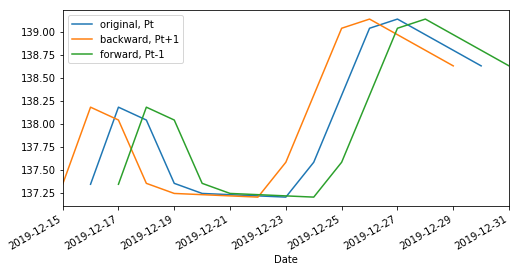

In [29]:
Pt.plot(figsize=(8, 3), label='original, Pt')
Pt.shift(-1,freq='D').plot(figsize=(8, 4), label='backward, Pt+1')
Pt.shift(1,freq='D').plot(figsize=(8, 4), label='forward, Pt-1')
plt.legend()
plt.show()

## Example - Analyzing the first difference#

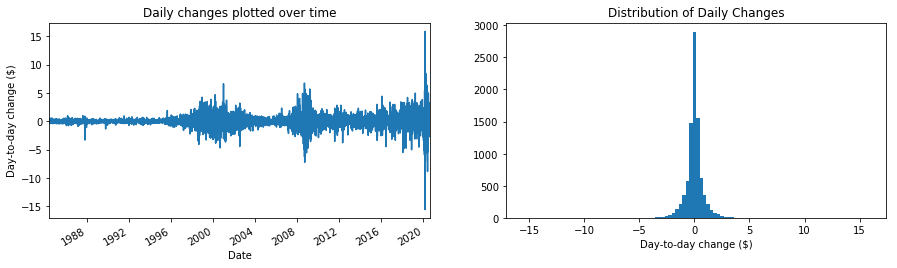

In [31]:
# Compute first difference
diff = prices - prices.shift(1)

# Plot the results

plt.subplot(121)
diff.plot(figsize=(15, 4))
plt.title('Daily changes plotted over time')
plt.ylabel('Day-to-day change ($)')

plt.subplot(122)
diff.hist(figsize=(15, 4),bins=100, grid=False)
plt.title('Distribution of Daily Changes')
plt.xlabel('Day-to-day change ($)')

plt.show()

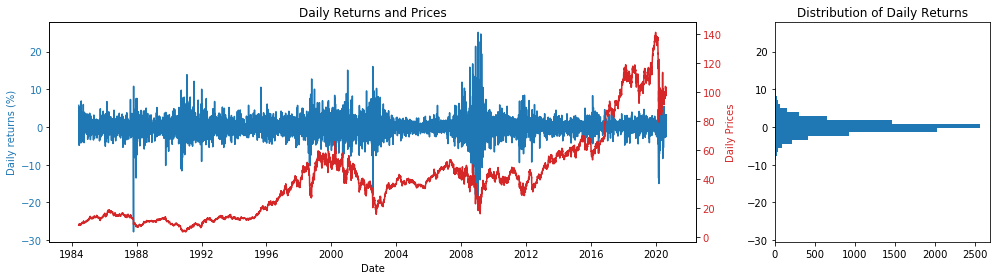

In [32]:
# Compute daily returns: divide the first difference by the price in the previous day
daily_percentage_change = 100*diff/prices.shift(1)

# drop the first value which is NaN
daily_percentage_change.dropna(inplace=True)

# Plot the results and original prices together
# initialize two subplots in 1 row and two columns. Also specify the width of each plot
fig, ax1 = plt.subplots(1,2,figsize=(14, 4),gridspec_kw={'width_ratios': [3, 1]})

# subplot for daily_percentage_change
color = 'tab:blue'
ax1[0].set_xlabel('Date')
ax1[0].set_ylabel('Daily returns (%)', color=color)
ax1[0].plot(daily_percentage_change, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

# Create twin axes, so they can share the same xaxis, i.e. Dates
ax2 = ax1[0].twinx() 

# daily prices on the same subplot
color = 'tab:red'
ax2.set_ylabel('Daily Prices', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Returns and Prices')

# create the second subplot which is the histogram of daily_percentage_change
ax1[1].hist(daily_percentage_change,bins=50,orientation='horizontal')
ax1[1].set_title('Distribution of Daily Returns')

fig.tight_layout()
plt.show()

## Example - Return on Investment

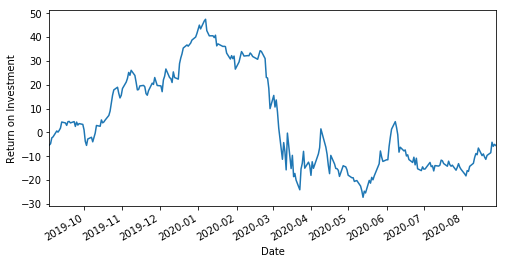

In [33]:
# Net profit over a year (in working days)
net_profit = prices-prices.shift(260)

# Return on Investment
roi = 100*net_profit/prices.shift(260)  

# Plot result
roi['2019-09-01':'2020-08-28'].plot(figsize=(8, 4))
plt.ylabel('Return on Investment')
plt.show()

# 08. Resampling and converting frequencies

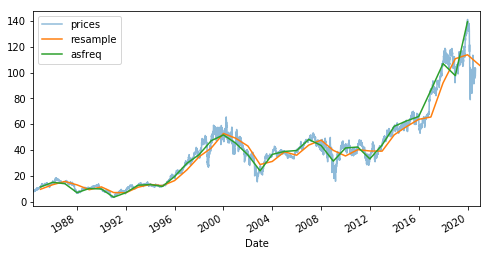

In [34]:
# Create the figure
plt.figure(figsize=(8, 4))

# Plot the prices
prices.plot(alpha=0.5)

# Downsampling - end of the business year
# Variant 1: using resample()
prices.resample('BA').mean().plot()

# Variant 2: using asfreq()
prices.asfreq('BA').plot()

plt.legend(['prices', 'resample', 'asfreq'], loc='upper left')
plt.show()

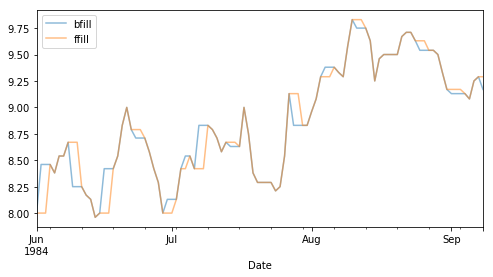

In [35]:
# Create the figure
plt.figure(figsize=(8, 4))

# Upsampling
# "backward fill" - fill missing with the closest value on the right
prices.asfreq('D', method='bfill')[0:100].plot(alpha=0.5)

# "forward fill" - fill missing with the closest value on the left
prices.asfreq('D', method='ffill')[0:100].plot(alpha=0.5)

plt.legend(['bfill', 'ffill'], loc='upper left')
plt.show()

In [36]:
from scipy.stats import skew, kurtosis

# calculate skewness and kurtosis for the resampled data 
s,k=[],[]
for resamp in ['B','W','M','Q']:
    s.append(skew(prices.pct_change().resample(resamp).mean().dropna()))
    k.append(kurtosis(prices.pct_change().resample(resamp).mean().dropna()))

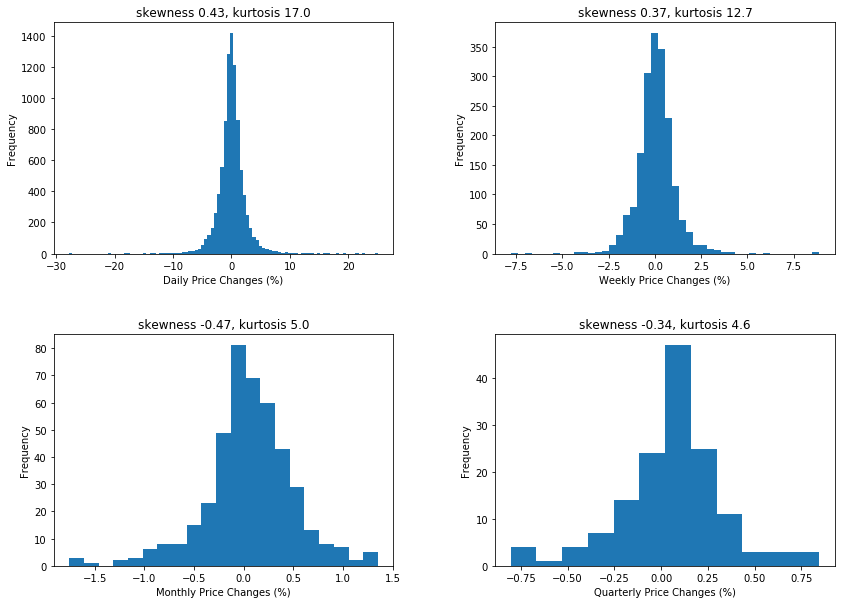

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), gridspec_kw={'hspace': 0.35, 'wspace': 0.3})

for (ax,resamp,freq,n_bin,i) in zip(axes.flatten(),
                                    ['B','W','M','Q'],                         # resampling frequency
                                    ['Daily','Weekly','Monthly','Quarterly'],  # x-axis labels
                                    [96,44,21,12],                             # number of bins
                                    [0,1,2,3]                                  # skewness and kurtosis as titles
                                   ):

    ax.hist(100*prices.pct_change().resample(resamp).mean(), n_bin)

    ax.set(xlabel = freq+' Price Changes (%)', 
           ylabel = 'Frequency',
           title  = 'skewness {:.2f}'.format(s[i])+
                    ', kurtosis {:.1f}'.format(3+k[i])
          )

plt.show();


# 09. Rolling windows

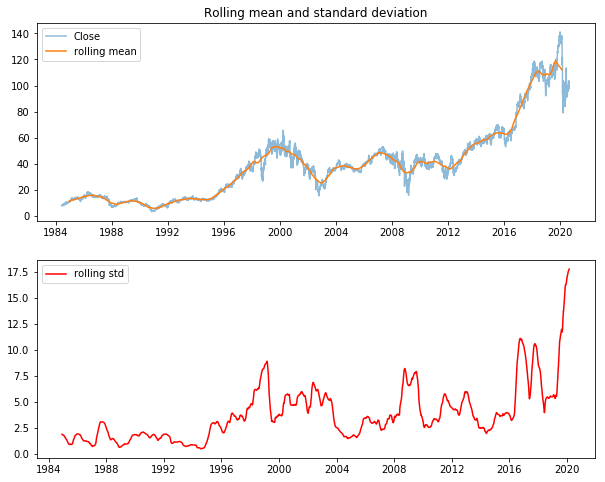

In [39]:
# Compute rolling mean and std
rolling_mean_1year = prices.rolling(260, center=True).mean()
rolling_std_1year = prices.rolling(260, center=True).std()

#Setup plot
fig, axes = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (0.5, 0.5)}, figsize=(10,8))

# Plot rolling mean and std
axes[0].set_title('Rolling mean and standard deviation')
axes[0].plot(prices, alpha=0.5)
axes[0].plot(rolling_mean_1year, label='rolling mean')
axes[0].legend()
axes[1].plot(rolling_std_1year, c='red', label='rolling std')
axes[1].legend()
plt.show()

In [40]:
def detect_outliers_rolling(timeseries, days=10, n_std=2, center=False):

    rolling_mean = timeseries.rolling(window=days, center=center).mean()
    rolling_std = timeseries.rolling(window=days, center=center).std()
    lower_bound = rolling_mean - (n_std * rolling_std)
    upper_bound = rolling_mean + (n_std * rolling_std)

    # Identify outliers
    mask = (timeseries < lower_bound) | (timeseries > upper_bound)
    outliers = timeseries[mask]

    # Plot bounds and outliers
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, "lightblue", label="Time series")
    plt.plot(rolling_mean, "orange", label="Rolling mean")
    plt.plot(upper_bound, "r--", label="Bounds", alpha=0.5)
    plt.plot(lower_bound, "r--", label="", alpha=0.5)
    plt.plot(outliers, "ro", markersize=5, label="Outlier candidate")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(
        "{} outliers detected using a moving window of size = {}".format(
            len(outliers), days
        )
    )
    plt.show()

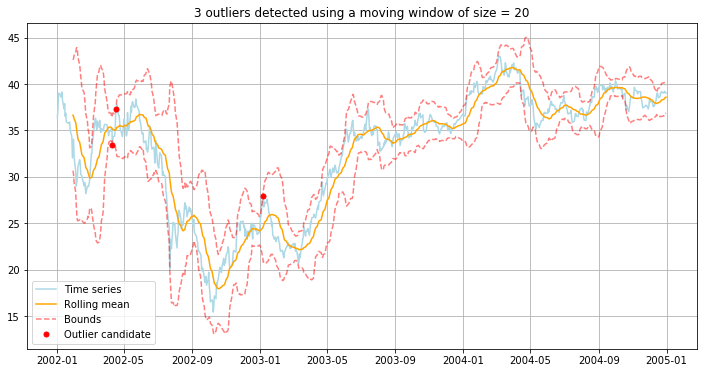

In [41]:
detect_outliers_rolling(prices['2002':'2004'], days=20, n_std=3)

# 10. Exercise: temperature data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

data = pd.read_csv('data/weatherHistory.csv', index_col='Date', parse_dates=True)
data.shape[0] #65499
data.tail()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
Date,,,,,,
2013-07-27 22:00:00,Clear,23.938889,0.64,6.1663,170,15.8263
2013-07-27 23:00:00,Clear,22.183333,0.70,3.1395,189,15.3111
2013-07-28 00:00:00,Clear,21.233333,0.75,6.2146,161,15.8263
2013-07-28 01:00:00,Clear,20.116667,0.83,3.2200,160,15.8263
2013-07-28 02:00:00,Clear,19.294444,0.85,3.1556,123,15.3111


In [49]:
temp = data['Temperature (C)']

In [50]:
temp.head()

Date
2006-04-01 00:00:00    9.472222
2006-04-01 01:00:00    9.355556
2006-04-01 02:00:00    9.377778
2006-04-01 03:00:00    8.288889
2006-04-01 04:00:00    8.755556
Name: Temperature (C), dtype: float64

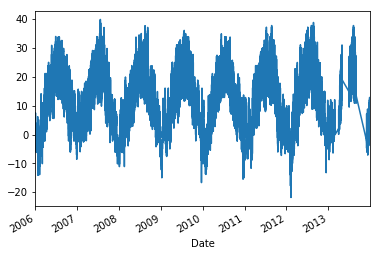

In [53]:
temp.plot()
plt.show()

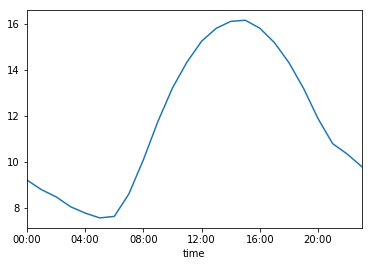

In [58]:
hour_jump = np.arange(6) * 4 *60*60
hour = temp.groupby(data.index.time).mean()
hour.plot(xticks=hour_jump)

plt.show()

In [62]:
month_jump = SemiMonthBegin
month = temp.groupby(data.index.month).mean()
#hour.plot(xticks=hour_jump)
month.plot()
plt.show()

TypeError: object of type 'type' has no len()